# Regression Model Validation - Lab

## Introduction

In this lab, you'll be able to validate your model using train-test-split.


## Objectives

You will be able to:

- Calculate the mean squared error (MSE) as a measure of predictive performance
- Validate the model using the test data


## Let's use our Boston Housing Data again!

This time, let's only include the variables that were previously selected using recursive feature elimination. We included the code to preprocess below.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_boston

boston = load_boston()

boston_features = pd.DataFrame(boston.data, columns = boston.feature_names)
b = boston_features["B"]
logdis = np.log(boston_features["DIS"])
loglstat = np.log(boston_features["LSTAT"])

# minmax scaling
boston_features["B"] = (b-min(b))/(max(b)-min(b))
boston_features["DIS"] = (logdis-min(logdis))/(max(logdis)-min(logdis))

#standardization
boston_features["LSTAT"] = (loglstat-np.mean(loglstat))/np.sqrt(np.var(loglstat))

In [2]:
X = boston_features[['CHAS', 'RM', 'DIS', 'B', 'LSTAT']]
y = pd.DataFrame(boston.target, columns=['price'])

## Perform a train-test-split

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

## Apply your model to the train set

#### Importing and initializing the model class

In [4]:
from sklearn.linear_model import LinearRegression
linereg = LinearRegression()

#### Fitting the model to the train data

In [5]:
linereg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

#### Calculating predictions on the train set, and on the test set

In [6]:
y_train_hat = linereg.predict(X_train)
y_test_hat = linereg.predict(X_test)

#### Calculating your residuals

In [7]:
res_train = y_train_hat-y_train
res_test = y_test_hat-y_test

#### Calculating the Mean Squared Error
A good way to compare overall performance is to compare the mean squarred error for the predicted values on the train and test sets.

In [8]:
train_mse = np.sum(res_train**2)/len(y_train)
test_mse = np.sum(res_test**2)/len(y_test)

In [9]:
print(train_mse)
print(test_mse)

price    19.044938
dtype: float64
price    33.393554
dtype: float64


If your test error is substantially worse then our train error, this is a sign that our model doesn't generalize well to future cases.

One simple way to demonstrate overfitting and underfitting is to alter the size of our train test split. By default, scikit learn's built in method allocates 25% of the data to the test set and 75% to the training set. Fitting a model on only 10% of the data is apt to lead to underfitting, while training a model on 99% of the data is apt to lead to overfitting.

# Evaluating the effect of train-test split size

Iterate over a range of train-test split sizes from .5 to .95. For each of these, generate a new train/test split sample. Fit a model to the training sample and calculate both the training error and the test error (mse) for each of these splits. Plot these two curves (train error vs. training size and test error vs. training size) on a graph.

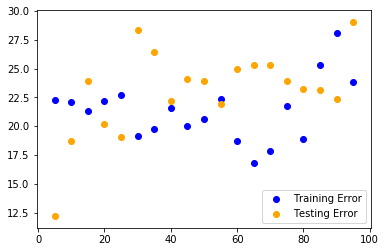

In [14]:
import matplotlib.pyplot as plt

train_error = []
test_error = []
test_sizes = list(range(5, 100, 5))
for i in test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = i/100)
    linereg.fit(X_train,y_train)
    y_train_hat = linereg.predict(X_train)
    y_test_hat = linereg.predict(X_test)
    res_train = y_train_hat-y_train
    res_test = y_test_hat-y_test
    train_mse = np.sum(res_train**2)/len(y_train)
    test_mse = np.sum(res_test**2)/len(y_test)
    train_error.append(train_mse)
    test_error.append(test_mse)
plt.scatter(test_sizes, train_error, color='blue', label='Training Error')
plt.scatter(test_sizes, test_error, color='orange', label='Testing Error')
plt.legend()

# Evaluating the effect of train-test split size: extension

Repeat the previous example, but for each train-test split size, generate 100 iterations of models/errors and save the average train/test error. This will help account for any particularly good/bad models that might have resulted from poor/good splits in the data. 

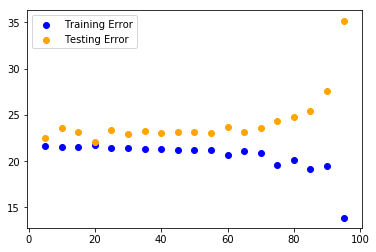

In [17]:
train_error = []
test_error = []
test_sizes = list(range(5, 100, 5))
for i in test_sizes:
    train_error_temp = []
    test_error_temp = []
    for num in range(100):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = i/100)
        linereg.fit(X_train,y_train)
        y_train_hat = linereg.predict(X_train)
        y_test_hat = linereg.predict(X_test)
        res_train = y_train_hat-y_train
        res_test = y_test_hat-y_test
        train_mse = np.sum(res_train**2)/len(y_train)
        test_mse = np.sum(res_test**2)/len(y_test)
        train_error_temp.append(train_mse)
        test_error_temp.append(test_mse)
    test_error.append(np.mean(test_error_temp))
    train_error.append(np.mean(train_error_temp))    
plt.scatter(test_sizes, train_error, color='blue', label='Training Error')
plt.scatter(test_sizes, test_error, color='orange', label='Testing Error')
plt.legend()

What's happening here? evaluate your result!

As we average out multiple samples at each test size, we get a more accurate representantion of our errors.  In the first graph, we are at the mercy of our test split.  If the test group is heavy with either extreme of our data, the split is faulty.  By taking multiple splits, it smooths this out because you are more likely to hit a more normal distribution of our data. The second graph shows a more realistic of how our errors would change as we increase test size.

##  Summary 

Congratulations! You now practiced your knowledge on MSE and on using train-test-split.